# Test Normal model implementation

In [1]:
import numpy as np
import pandas as pd
from option_models import bsm
from option_models import basket
from option_models import basket_Levy
from matplotlib import pyplot as plt

In [2]:
### only run this when you changed the class definition
import imp
imp.reload(basket)

<module 'option_models.basket' from 'C:\\Users\\Jeremy\\Documents\\GitHub\\Project-team_asap\\option_models\\basket.py'>

weights: [1 0 0 0]
cor_m: 
 [[ 1.   0.2  0.2  0.2]
 [ 0.2  1.   0.2  0.2]
 [ 0.2  0.2  1.   0.2]
 [ 0.2  0.2  0.2  1. ]]
              bsm       levy         mc           gap
strike                                               
80      21.185930  21.185930  21.157571 -8.526513e-14
81      20.348379  20.348379  20.650770 -4.263256e-14
82      19.526455  19.526455  19.535499 -4.263256e-14
83      18.720866  18.720866  19.134718 -4.263256e-14
84      17.932279  17.932279  18.130319 -5.684342e-14
85      17.161318  17.161318  17.437259 -5.684342e-14
86      16.408558  16.408558  16.497773 -5.684342e-14
87      15.674521  15.674521  15.662395 -5.684342e-14
88      14.959672  14.959672  14.885233 -6.394885e-14
89      14.264418  14.264418  14.415426 -5.684342e-14
90      13.589108  13.589108  13.343508 -6.394885e-14
91      12.934027  12.934027  12.909964 -8.526513e-14
92      12.299398  12.299398  12.327845 -5.684342e-14
93      11.685384  11.685384  11.443844 -7.815970e-14
94      11.0920

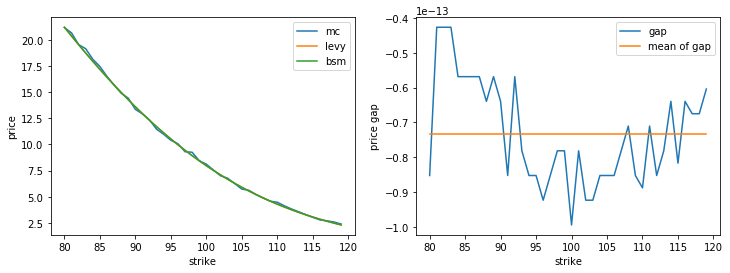

In [4]:
# A trivial test case 1: 
# one asset have 100% weight (the others zero)
# the case should be equivalent to the BSM or Normal model price

spot = np.ones(4) * 100
vol = np.ones(4) * 0.2
weights = np.array([1, 0, 0, 0])
divr = np.zeros(4)
intr = 0
cor_m = 0.8*np.identity(4) + 0.2*np.ones((4,4))
texp = 1
print('weights:',weights);print('cor_m: \n',cor_m)

basket1 = basket_Levy.Basket(vol, weights, cor_m, divr)

strikeRange = np.arange(80,120,1)
bsmList=[]
mcList=[]
levyList=[]

for strike in strikeRange:
    bsmList.append(bsm.bsm_price(strike, spot[0], vol[0], texp, intr, divr[0], cp_sign=1))
    mcList.append(basket.basket_price_mc(strike, spot, vol, weights, texp, cor_m, bsm=True))
    levyList.append(basket1.price_Levy(strike, spot, texp, intr))

priceFrm=pd.DataFrame({'mc':mcList,'levy':levyList,'bsm':bsmList},index=strikeRange)
priceFrm['gap']=priceFrm['levy']-priceFrm['bsm']
priceFrm.index.name='strike'
print (priceFrm)
print('------DEV------')
print (np.sqrt((priceFrm.gap**2).mean()))
fig=plt.figure(figsize=(12,4))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
ax1.plot(strikeRange,mcList,label='mc')
ax1.plot(strikeRange,levyList,label='levy')
ax1.plot(strikeRange,bsmList,label='bsm')
ax2.plot(strikeRange,priceFrm.gap,label='gap')
ax2.plot(strikeRange,[np.mean(priceFrm.gap)]*len(strikeRange),label='mean of gap')
ax1.legend(loc='best')
ax2.legend(loc='best')
ax1.set_xlabel('strike')
ax2.set_xlabel('strike')
ax1.set_ylabel('price')
ax2.set_ylabel('price gap')
plt.show()

In [5]:
def plotGap(mcList,levyList,var,varRange):
    priceFrm=pd.DataFrame({'mc':mcList,'levy':levyList},index=varRange)
    priceFrm['gap']=priceFrm['levy']-priceFrm['mc']
    priceFrm.index.name=var
    print (priceFrm)
    print('------DEV------')
    print (np.sqrt((priceFrm.gap**2).mean()))
    fig=plt.figure(figsize=(12,4))
    ax1=fig.add_subplot(1,2,1)
    ax2=fig.add_subplot(1,2,2)
    ax1.plot(varRange,mcList,'o''-',label='mc')
    ax1.plot(varRange,levyList,'*''-',label='levy')
    ax2.plot(varRange,priceFrm.gap,label='gap')
    ax2.plot(varRange,[np.mean(priceFrm.gap)]*len(varRange),label='mean of gap')
    ax1.legend(loc='best')
    ax2.legend(loc='best')
    ax1.set_xlabel(var)
    ax2.set_xlabel(var)
    ax1.set_ylabel('price')
    ax2.set_ylabel('price gap')
    plt.show()
    return 

weights: [ 0.25  0.25  0.25  0.25]
cor_m: 
 [[ 1.      0.9999  0.9999  0.9999]
 [ 0.9999  1.      0.9999  0.9999]
 [ 0.9999  0.9999  1.      0.9999]
 [ 0.9999  0.9999  0.9999  1.    ]]
             levy         mc       gap
strike                                
80      21.185787  21.221462 -0.035676
81      20.348226  20.468658 -0.120433
82      19.526291  19.646647 -0.120357
83      18.720690  18.949822 -0.229132
84      17.932092  17.713738  0.218354
85      17.161121  16.852958  0.308163
86      16.408350  16.252759  0.155592
87      15.674303  15.737307 -0.063004
88      14.959444  15.056788 -0.097344
89      14.264181  14.330077 -0.065896
90      13.588862  13.616287 -0.027425
91      12.933772  13.143016 -0.209244
92      12.299136  12.648325 -0.349189
93      11.685115  12.032125 -0.347010
94      11.091810  10.979612  0.112198
95      10.519260  10.577064 -0.057803
96       9.967449   9.804421  0.163028
97       9.436299   9.378530  0.057769
98       8.925682   9.156029 -0.230

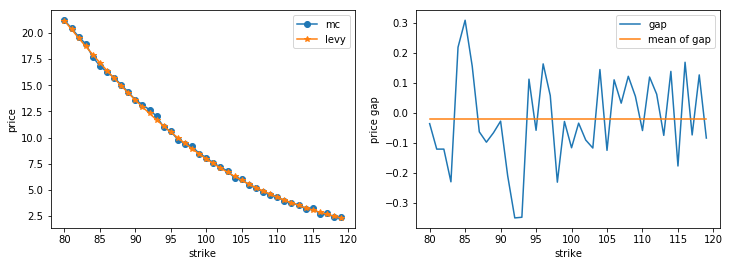

In [17]:
# A trivial test case 2

# all assets almost perfectly correlated:
# the case should be equivalent to the BSM or Normal model price

spot = np.ones(4) * 100
vol = np.ones(4) * 0.2
weights = np.ones(4) * 0.25
divr = np.zeros(4)
intr = 0
cor_m = 0.0001*np.identity(4) + 0.9999*np.ones((4,4))
texp = 1

print('weights:',weights);print('cor_m: \n',cor_m)

basket2 = basket_Levy.Basket(vol, weights, cor_m, divr)

strikeRange = np.arange(80,120,1)
mcList=[]
levyList=[]

for strike in strikeRange:
    mcList.append(basket.basket_price_mc(strike, spot, vol, weights, texp, cor_m, bsm=True))
    levyList.append(basket2.price_Levy(strike, spot, texp, intr))

plotGap(mcList,levyList,'strike',strikeRange)

In [18]:
# A test set for basket option
spot = np.ones(4) * 100
vol = np.ones(4) * 0.4
weights = np.ones(4) * 0.25
divr = np.zeros(4)
intr = 0
cor_m = 0.5*np.identity(4) + 0.5*np.ones((4,4))
texp = 5

weights: [ 0.25  0.25  0.25  0.25]
cor_m: 
 [[ 1.   0.5  0.5  0.5]
 [ 0.5  1.   0.5  0.5]
 [ 0.5  0.5  1.   0.5]
 [ 0.5  0.5  0.5  1. ]]
             levy         mc       gap
strike                                
80      36.398241  35.464819  0.933422
81      35.921035  35.981917 -0.060882
82      35.450670  35.367195  0.083475
83      34.987055  35.387163 -0.400108
84      34.530098  35.409911 -0.879813
85      34.079709  33.409522  0.670187
86      33.635796  33.095941  0.539855
87      33.198270  32.705092  0.493179
88      32.767041  31.892689  0.874352
89      32.342021  32.404862 -0.062841
90      31.923122  31.134765  0.788357
91      31.510255  32.629543 -1.119287
92      31.103336  31.771527 -0.668191
93      30.702278  30.509845  0.192433
94      30.306996  30.353050 -0.046054
95      29.917406  29.314974  0.602433
96      29.533426  29.460457  0.072970
97      29.154973  29.606286 -0.451313
98      28.781965  28.594051  0.187914
99      28.414323  28.018158  0.396165
100  

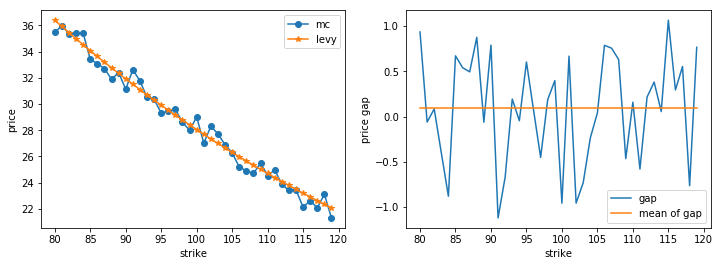

In [19]:
# MC price based on normal model
# make sure that the prices are similar
print('weights:',weights);print('cor_m: \n',cor_m)

basket3 = basket_Levy.Basket(vol, weights, cor_m, divr)

strikeRange = np.arange(80,120,1)
mcList=[]
levyList=[]

for strike in strikeRange:
    mcList.append(basket.basket_price_mc(strike, spot, vol, weights, texp, cor_m, bsm=True))
    levyList.append(basket3.price_Levy(strike, spot, texp, intr))

plotGap(mcList,levyList,'strike',strikeRange)

In [21]:
#standard test example in Paper
spot = np.ones(4) * 100
vol = np.ones(4) * 0.4
weights = np.ones(4) * 0.25
divr = np.zeros(4)
intr = 0
cor_m = 0.5*np.identity(4) + 0.5*np.ones((4,4))
texp = 5
strike=100

           levy         mc       gap
cor                                 
0.10  22.064965  22.012981  0.051984
0.30  25.173879  25.595290 -0.421410
0.50  28.051966  27.498115  0.553851
0.70  30.750998  30.996605 -0.245607
0.80  32.043491  30.737969  1.305522
0.95  33.918719  33.607255  0.311464
------DEV------
0.625667732137


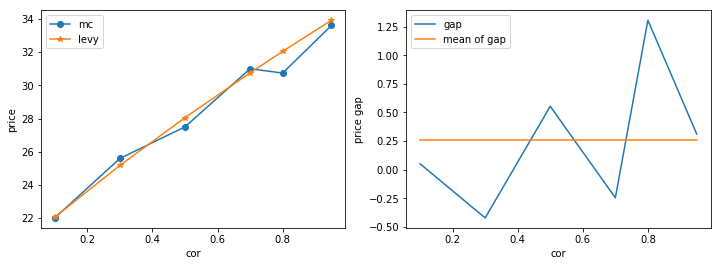

In [22]:
#(a) varing the correlations
corRange=[0.1,0.3,0.5,0.7,0.8,0.95]

mcList=[]
levyList=[]

for cor in corRange:
    cor_m = (1-cor)*np.identity(4) + cor*np.ones((4,4))
    basket4a = basket_Levy.Basket(vol, weights, cor_m, divr)
    mcList.append(basket.basket_price_mc(strike, spot, vol, weights, texp, cor_m, bsm=True))
    levyList.append(basket4a.price_Levy(strike, spot, texp, intr))

plotGap(mcList,levyList,'cor',corRange)

             levy         mc       gap
strike                                
50      54.342810  54.328944  0.013866
60      47.521086  48.186363 -0.665277
70      41.567013  42.677712 -1.110699
80      36.398241  36.176314  0.221927
90      31.923122  30.819595  1.103526
100     28.051966  26.940781  1.111185
110     24.702296  24.715407 -0.013111
120     21.800801  21.901420 -0.100619
130     19.283605  19.683061 -0.399456
140     17.095702  18.031377 -0.935675
150     15.190057  16.480926 -1.290869
------DEV------
0.791424699577


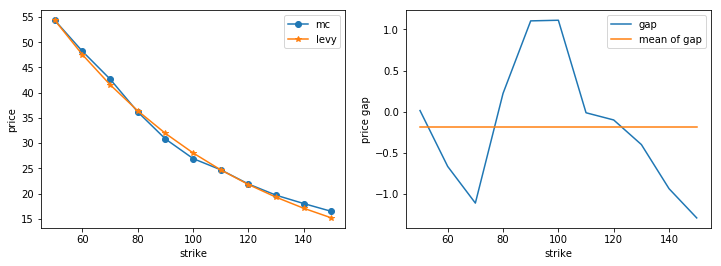

In [23]:
#(b) varing the strikes
#standard test example in Paper
spot = np.ones(4) * 100
vol = np.ones(4) * 0.4
weights = np.ones(4) * 0.25
divr = np.zeros(4)
intr = 0
cor_m = 0.5*np.identity(4) + 0.5*np.ones((4,4))
texp = 5
strike=100
strikeRange=range(50,160,10)

mcList=[]
levyList=[]
basket4b = basket_Levy.Basket(vol, weights, cor_m, divr)
for strike in strikeRange:
    mcList.append(basket.basket_price_mc(strike, spot, vol, weights, texp, cor_m, bsm=True))
    levyList.append(basket4b.price_Levy(strike, spot, texp, intr))

plotGap(mcList,levyList,'strike',strikeRange)

             levy         mc       gap
foward                                
50       4.342810   4.247532  0.095278
60       7.521086   7.242092  0.278994
70      11.567013  11.875187 -0.308174
80      16.398241  15.826674  0.571567
90      21.923122  21.073466  0.849656
100     28.051966  27.898909  0.153057
110     34.702296  33.799857  0.902439
120     41.800801  40.722453  1.078348
130     49.283605  49.423906 -0.140301
140     57.095702  56.699835  0.395867
150     65.190057  63.285120  1.904936
------DEV------
0.799791172746


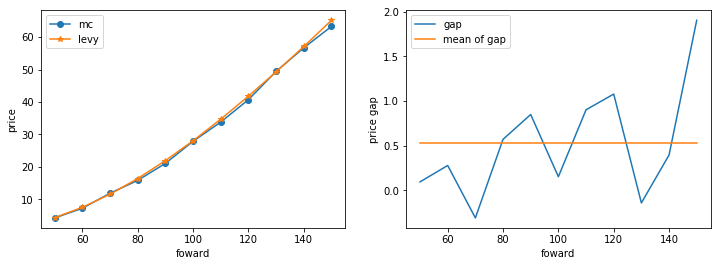

In [24]:
#(c) varing the fowards
#standard test example in Paper
spot = np.ones(4) * 100
vol = np.ones(4) * 0.4
weights = np.ones(4) * 0.25
divr = np.zeros(4)
intr = 0
cor_m = 0.5*np.identity(4) + 0.5*np.ones((4,4))
texp = 5
strike=100
strikeRange=range(50,160,10)
fowardsRange=range(50,160,10)

mcList=[]
levyList=[]
basket4c = basket_Levy.Basket(vol, weights, cor_m, divr)
for foward in fowardsRange:
    spot=np.ones(4)*foward
    mcList.append(basket.basket_price_mc(strike, spot, vol, weights, texp, cor_m, bsm=True))
    levyList.append(basket4c.price_Levy(strike, spot, texp, intr))

plotGap(mcList,levyList,'foward',fowardsRange)

           levy         mc       gap
vol                                 
0.05   3.525864   3.554188 -0.028325
0.10   7.049808   6.910413  0.139395
0.15  10.569946  10.533003  0.036943
0.20  14.084451  14.137705 -0.053254
0.30  21.089636  20.688061  0.401574
0.40  28.051966  28.652614 -0.600647
0.50  34.957111  33.905493  1.051618
0.60  41.784920  41.304405  0.480515
0.70  48.500933  52.856689 -4.355756
0.80  55.046131  51.068671  3.977460
1.00  67.242536  67.117143  0.125394
------DEV------
1.82636723472


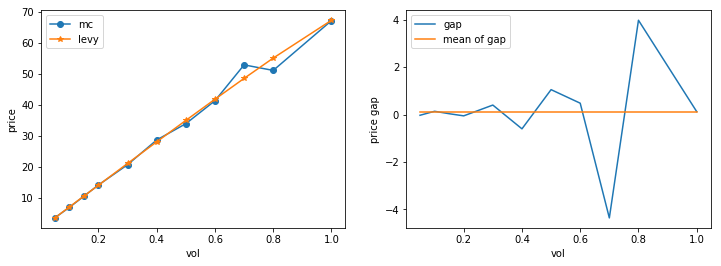

In [25]:
#(d1) varing the volatility, σi is set to the same value σ,which is
#varied between 5% and 100%.
#standard test example in Paper
spot = np.ones(4) * 100
vol = np.ones(4) * 0.4
weights = np.ones(4) * 0.25
divr = np.zeros(4)
intr = 0
cor_m = 0.5*np.identity(4) + 0.5*np.ones((4,4))
texp = 5
strike=100
strikeRange=range(50,160,10)
volRange=[0.05,0.1,0.15,0.2,0.3,0.4,0.5,0.6,0.7,0.8,1]

mcList=[]
levyList=[]

for vol in volRange:
    vol=np.ones(4) * vol
    basket4d1 = basket_Levy.Basket(vol, weights, cor_m, divr)
    mcList.append(basket.basket_price_mc(strike, spot, vol, weights, texp, cor_m, bsm=True))
    levyList.append(basket4d1.price_Levy(strike, spot, texp, intr))

plotGap(mcList,levyList,'vol',volRange)

           levy         mc        gap
vol                                  
0.05   3.525864   3.526816  -0.000952
0.10   6.214088   6.086812   0.127276
0.15   8.955605   9.231546  -0.275941
0.20  11.745096  11.431821   0.313275
0.30  17.510366  16.962240   0.548126
0.40  23.602371  22.084922   1.517449
0.50  30.085795  28.044550   2.041245
0.60  36.956872  34.055448   2.901424
0.70  44.112022  38.915888   5.196134
0.80  51.344872  43.058628   8.286245
1.00  64.994216  48.073376  16.920840
------DEV------
6.01025649613


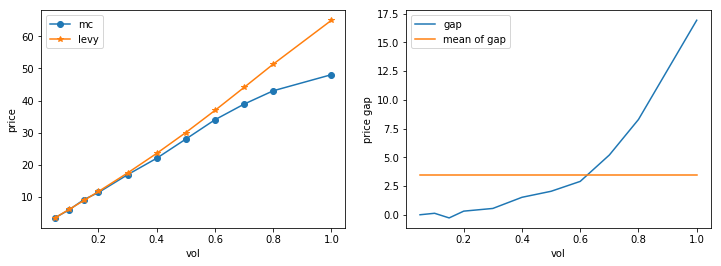

In [26]:
#(d2) varing the volatility, fix σ1 = 5% and vary the remaining volatilities symmetrically.
#varied between 5% and 100%.
#standard test example in Paper
spot = np.ones(4) * 100
vol = np.ones(4) * 0.4
weights = np.ones(4) * 0.25
divr = np.zeros(4)
intr = 0
cor_m = 0.5*np.identity(4) + 0.5*np.ones((4,4))
texp = 5
strike=100
strikeRange=range(50,160,10)

volRange=[0.05,0.1,0.15,0.2,0.3,0.4,0.5,0.6,0.7,0.8,1]

mcList=[]
levyList=[]

for vol in volRange:
    vol=np.array([0.05,vol,vol,vol])
    basket4d2 = basket_Levy.Basket(vol, weights, cor_m, divr)
    mcList.append(basket.basket_price_mc(strike, spot, vol, weights, texp, cor_m, bsm=True))
    levyList.append(basket4d2.price_Levy(strike, spot, texp, intr))

plotGap(mcList,levyList,'vol',volRange)

           levy         mc        gap
vol                                  
0.05  55.457105  22.481203  32.975902
0.10  55.524322  19.445983  36.078339
0.15  55.607769  25.322883  30.284887
0.20  55.709174  31.680104  24.029070
0.30  55.976048  29.135668  26.840380
0.40  56.354245  37.002836  19.351409
0.50  56.894080  39.259352  17.634727
0.60  57.682804  44.194074  13.488729
0.70  58.870625  49.014339   9.856287
0.80  60.695344  52.797675   7.897668
1.00  67.242536  59.716610   7.525926
------DEV------
22.7388310438


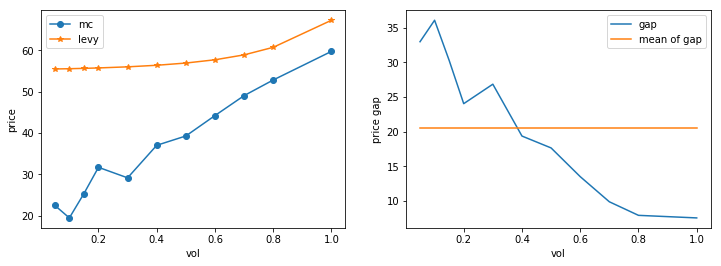

In [29]:
#(d3) varing the volatility, fix σ1 =100% and vary the remaining volatilities symmetrically.
#varied between 5% and 100%.
#standard test example in Paper
spot = np.ones(4) * 100
vol = np.ones(4) * 0.4
weights = np.ones(4) * 0.25
divr = np.zeros(4)
intr = 0
cor_m = 0.5*np.identity(4) + 0.5*np.ones((4,4))
texp = 5
strike=100
strikeRange=range(50,160,10)
volRange=[0.05,0.1,0.15,0.2,0.3,0.4,0.5,0.6,0.7,0.8,1]

mcList=[]
levyList=[]

for vol in volRange:
    vol=np.array([1,vol,vol,vol])
    basket4d1 = basket_Levy.Basket(vol, weights, cor_m, divr)
    mcList.append(basket.basket_price_mc(strike, spot, vol, weights, texp, cor_m, bsm=True))
    levyList.append(basket4d1.price_Levy(strike, spot, texp, intr))

plotGap(mcList,levyList,'vol',volRange)